In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models



In [2]:
# This uses to load the data and store in tuples
(trainign_images,training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data() 

In [3]:
# Normalizing the image's each individual pixel by giving a value from 0 to 1
trainign_images,testing_images = trainign_images/255,testing_images/255

In [4]:
print(training_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
# Thesse are the labels of the objects that we are going to classify
class_names = ['plane','car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

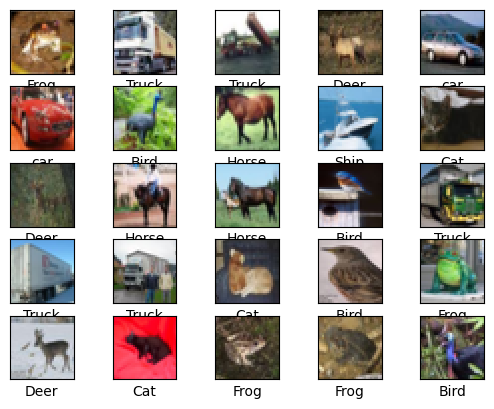

In [6]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainign_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()

In [7]:
trainign_images = trainign_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(trainign_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))

Epoch 1/20
625/625 [==============================] - 10s 8ms/step - loss: 1.7208 - accuracy: 0.3663 - val_loss: 1.4472 - val_accuracy: 0.4753
Epoch 2/20
625/625 [==============================] - 5s 7ms/step - loss: 1.3649 - accuracy: 0.5145 - val_loss: 1.3187 - val_accuracy: 0.5157
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 1.2080 - accuracy: 0.5720 - val_loss: 1.1829 - val_accuracy: 0.5825
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0974 - accuracy: 0.6144 - val_loss: 1.1241 - val_accuracy: 0.5997
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0189 - accuracy: 0.6420 - val_loss: 1.0799 - val_accuracy: 0.6223
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9432 - accuracy: 0.6708 - val_loss: 1.1404 - val_accuracy: 0.6148
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.8790 - accuracy: 0.6926 - val_loss: 1.0795 - val_accuracy: 0.6242
Epoch

In [9]:
loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save('image_classifire.model')


125/125 [==============================] - 1s 4ms/step - loss: 1.6271 - accuracy: 0.6270
Loss: 1.627114176750183
Accuracy: 0.6269999742507935


INFO:tensorflow:Assets written to: image_classifire.model\assets


INFO:tensorflow:Assets written to: image_classifire.model\assets


In [ ]:
model = models.load_model('image_classifire.model')

